## **Simple linear regression - relation between heating and cooling loads**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

##### **Import energy data**

In [2]:
#ds = pd.read_csv(".\\data\\energy.csv")
ds=pd.read_csv('https://raw.githubusercontent.com/sekhargullapalli/exploring-data-science/master/data/energy.csv')
print(ds.shape)
ds.describe()

(768, 10)


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


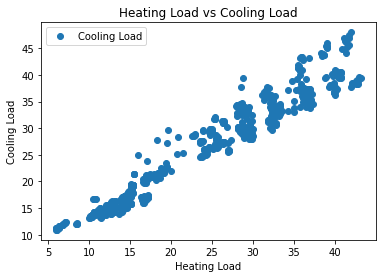

In [3]:
ds.plot(x='Heating Load', y='Cooling Load', style='o')  
plt.title('Heating Load vs Cooling Load')  
plt.xlabel('Heating Load')  
plt.ylabel('Cooling Load')  
plt.show()

##### **Using seaborn for distribution plot**

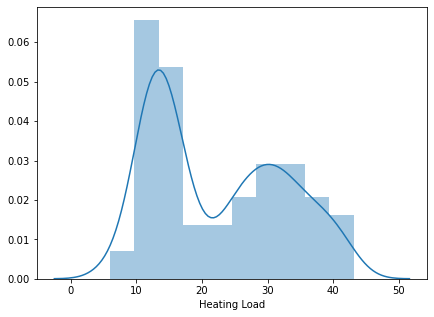

In [4]:
import seaborn as seabornInstance 
plt.figure(figsize=(7,5))
plt.tight_layout()
seabornInstance.distplot(ds['Heating Load'])


In [5]:
#reshaping datafram elements to column matrixes
hl=ds['Heating Load'].values.reshape(-1,1)
cl=ds['Cooling Load'].values.reshape(-1,1)

#### **Splitting the data and linear regression (using SKLEARN)**

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(hl,cl,test_size=0.2,random_state=0)
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,Y_train)
print(f'R-Squared (train): {lr.score(X_train, Y_train)}')
print(f'R-Squared (test): {lr.score(X_test, Y_test)}')
print(f'Coefficient: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')


R-Squared (train): 0.9530279860845231
R-Squared (test): 0.9492053027758003
Coefficient: [[0.92601266]]
Intercept: [3.97963505]


Text(0, 0.5, 'Cooling Load')

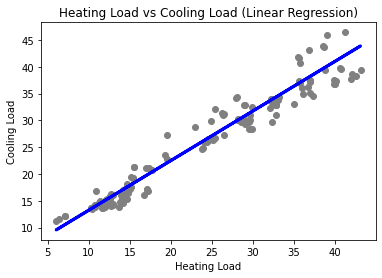

In [7]:
Y_pred = lr.predict(X_test)
res = pd.DataFrame(
    {
        'Cl_Actual':Y_test.flatten(),
        'Cl_Predicted':Y_pred.flatten(),        
    }
)
res['CL_Error_Rel_Per'] = (res.Cl_Predicted-res.Cl_Actual)/res.Cl_Actual*100
plt.scatter(X_test,Y_test,color='gray')
plt.plot(X_test,Y_pred,color='blue', linewidth=3)
plt.title('Heating Load vs Cooling Load (Linear Regression)')  
plt.xlabel('Heating Load')  
plt.ylabel('Cooling Load')  

##### **Error Analysis (using metrics)**

In [8]:
print('Mean Absolute Error:', np.around(metrics.mean_absolute_error(Y_test, Y_pred),2))  
print('Mean Squared Error:', np.around(metrics.mean_squared_error(Y_test, Y_pred),2))  
print('Root Mean Squared Error:', np.around(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)),2))

Mean Absolute Error: 1.6
Mean Squared Error: 4.78
Root Mean Squared Error: 2.19


In [9]:
print("Relative Errors:")
res['CL_Error_Rel_Per'].describe(percentiles=np.arange(0,1,0.1))




Relative Errors:


count    154.000000
mean       1.364972
std        8.108920
min      -19.278821
0%       -19.278821
10%      -11.031560
20%       -5.144114
30%       -1.008085
40%        0.361788
50%        1.445766
60%        2.870220
70%        4.423738
80%        8.296316
90%       11.700780
max       21.756793
Name: CL_Error_Rel_Per, dtype: float64